<a href="https://colab.research.google.com/github/vinayakgautam368/FACE-UNLOCK/blob/main/TRIPLET_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# THIS IS SIMPLE CNN MODEL WITH INBUILT TRIPLETLOSS IN PYTORCH 
# WE USE DATASET OF 20IMAGES 10 FOR EACH CLASS

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import keras

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
directory="/content/gdrive/MyDrive/Face_Detection_Data/"
CATEGORIES=["Vinayak","Utkarsh"]

In [ ]:
data=[]
k=1
for category in CATEGORIES:
  label = CATEGORIES.index(category)
  path = os.path.join(directory,category)
  m = os.listdir(path)
  for img in m :
    arr = os.path.join(path,img)
    img_arr = cv2.imread(arr)
    img_arr = cv2.resize(img_arr,(256,256))
    data.append([img_arr.T,label])
    print(k)
    k = k +1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [ ]:
random.shuffle(data)
X=[]
Y=[]
for i,j in data:
  X.append(i)
  Y.append(j)


In [ ]:
import numpy as np
X=np.array(X) 
Y=np.array(Y)
print(X.shape)

(20, 3, 256, 256)


In [ ]:
classes=np.unique(Y)
classes=list(classes)
print(classes)
a=[]
p=[]
n=[]
a_out=[]
p_out=[]
n_out=[]
for i in range(X.shape[0]):
  pos_neg=random.sample(classes,2)

  
  pos_sample=random.sample(list(X[Y==pos_neg[0]]),2)
  
  a_out.append(pos_neg[0])
  p_out.append(pos_neg[0])

  neg_sample=random.choice(list(X[Y==pos_neg[1]]))
  n_out.append(pos_neg[1])


  a.append(pos_sample[0])
  
  p.append(pos_sample[1])
  n.append(neg_sample)

[0, 1]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,8,3)
    self.conv2=nn.Conv2d(8,16,3)
    self.conv3=nn.Conv2d(16,64,3)
    self.conv4=nn.Conv2d(64,128,3)
    self.conv5=nn.Conv2d(128,256,3)
    self.conv6=nn.Conv2d(256,512,3)

    self.fc1=nn.Linear(2*2*512,500)
    self.fc2=nn.Linear(500,200)
    self.fc3=nn.Linear(200,128)


  def forward(self,x):
      x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
      x=F.max_pool2d(F.relu(self.conv2(x)),(2,2))
      x=F.max_pool2d(F.relu(self.conv3(x)),(2,2))
      x=F.max_pool2d(F.relu(self.conv4(x)),(2,2))
      x=F.max_pool2d(F.relu(self.conv5(x)),(2,2))
      x=F.max_pool2d(F.relu(self.conv6(x)),(2,2))
      # print(x.shape)

      x=x.view(-1,2*2*512)

      x=F.relu(self.fc1(x))
      x=F.relu(self.fc2(x))
      x=self.fc3(x)

      return x

net=Net()
print(net)      







    


Net(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=2048, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=128, bias=True)
)


In [ ]:
import torch.optim as optim
optimizer=optim.Adam(net.parameters())
print(optimizer)


Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)


In [ ]:

a=torch.tensor(a)
a=a/255.0
p=torch.tensor(p)
p=p/255.0
n=torch.tensor(n)
n=n/255.0
a_out=torch.tensor(a_out)
p_out=torch.tensor(p_out)
n_out=torch.tensor(n_out)

In [ ]:
temp = net(a[0:2])
print(temp.shape)

torch.Size([2, 128])


In [ ]:
criterion = nn.TripletMarginLoss(margin=0.7)



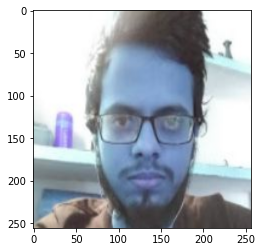

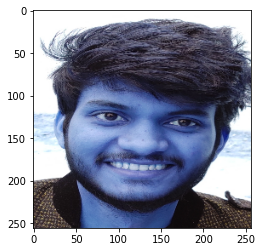

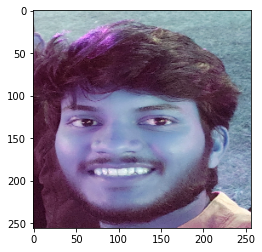

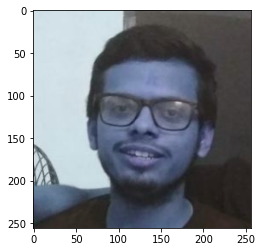

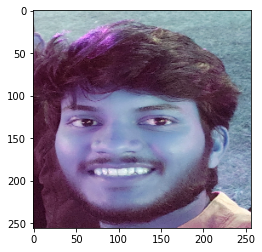

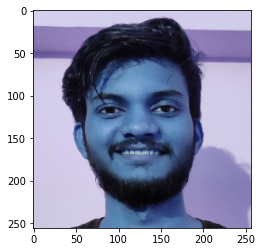

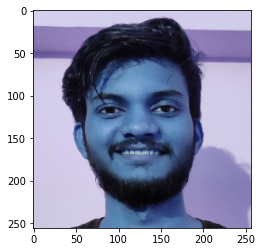

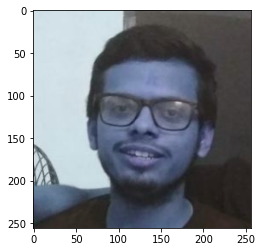

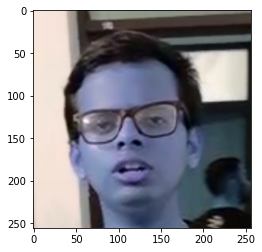

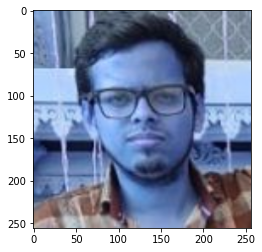

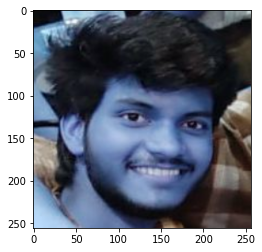

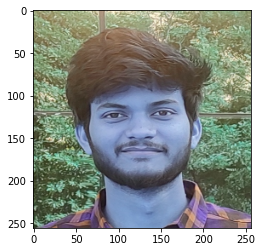

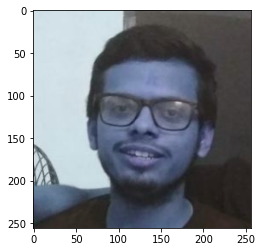

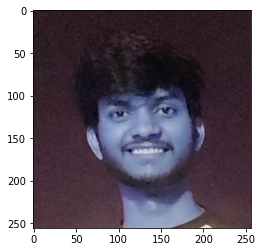

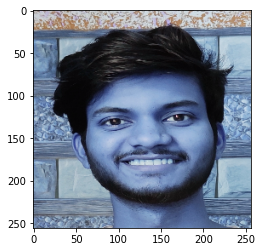

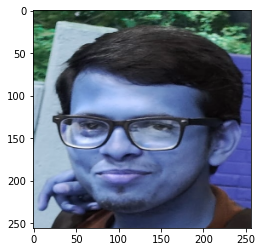

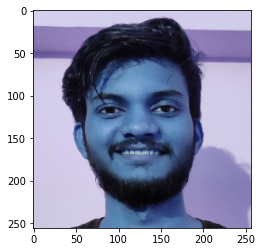

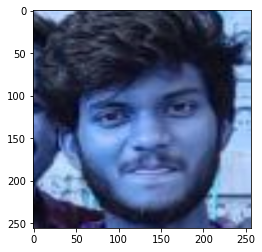

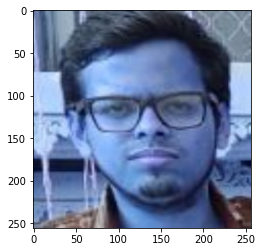

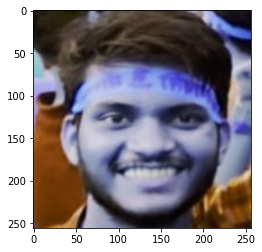

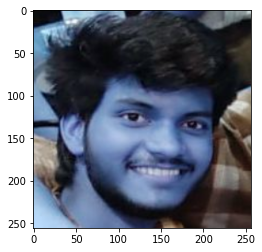

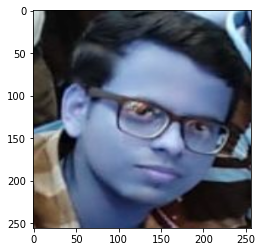

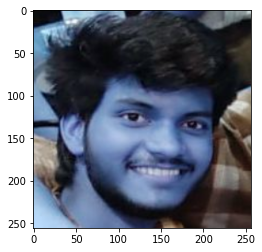

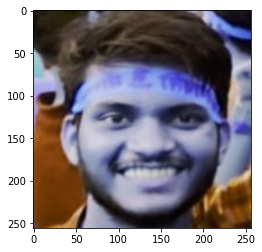

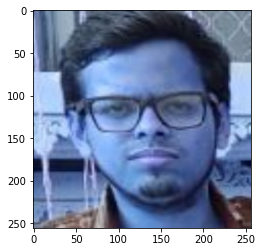

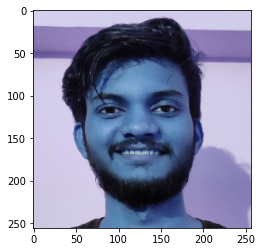

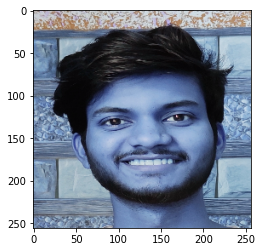

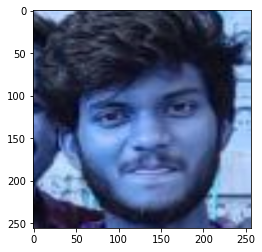

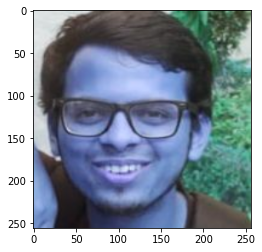

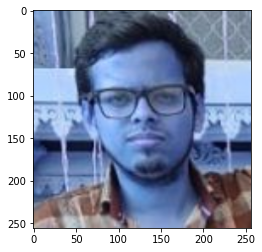

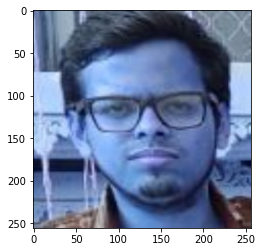

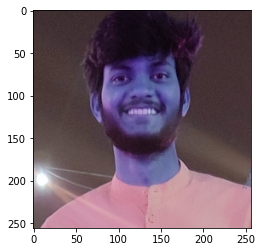

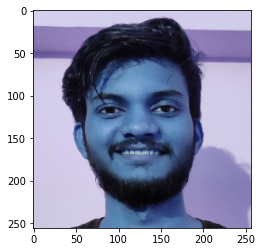

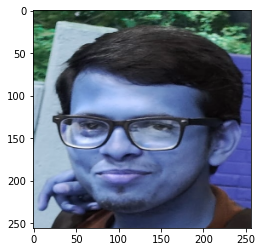

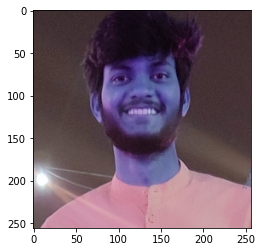

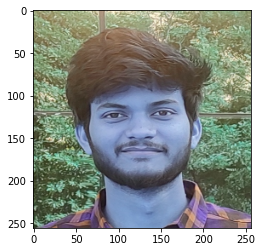

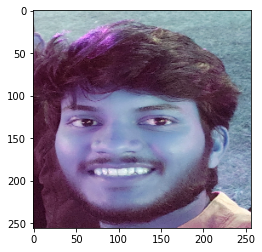

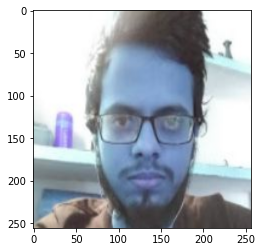

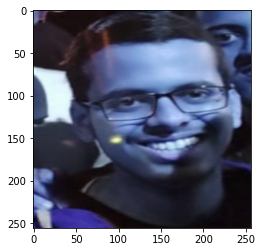

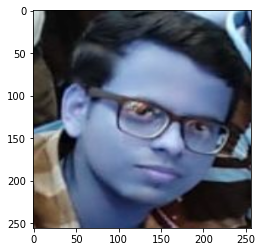

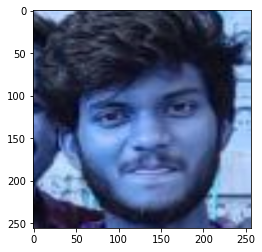

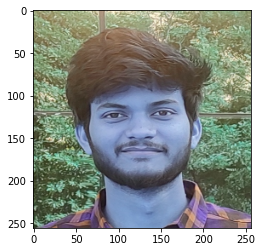

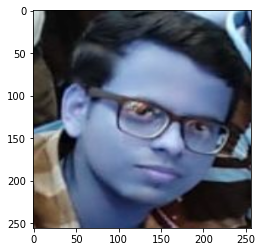

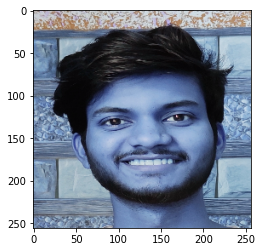

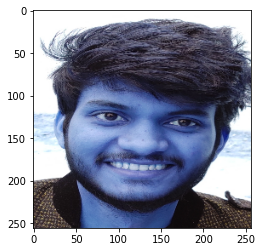

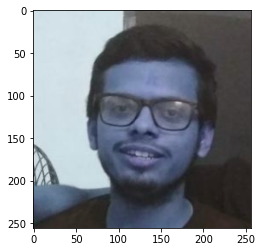

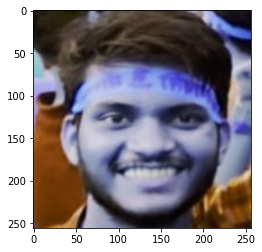

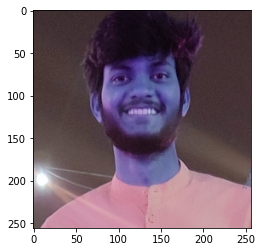

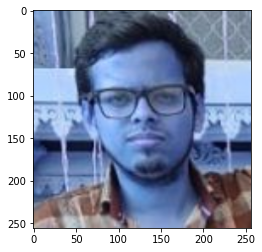

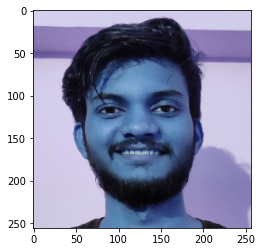

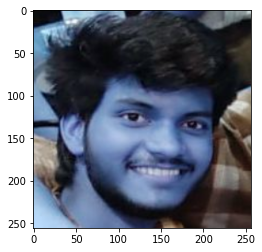

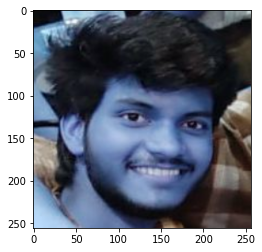

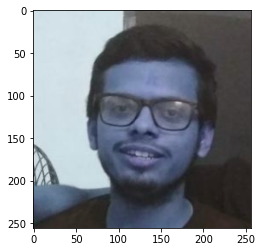

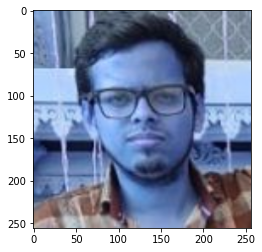

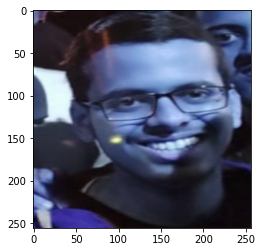

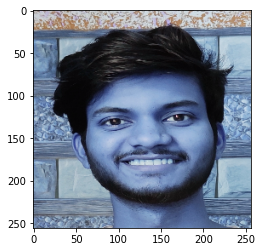

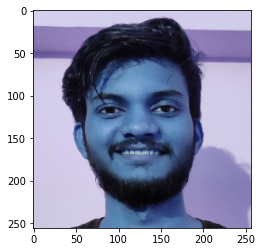

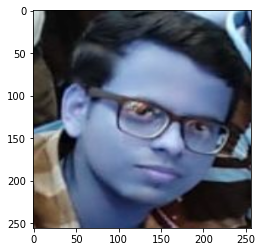

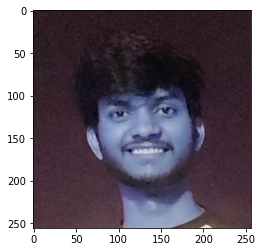

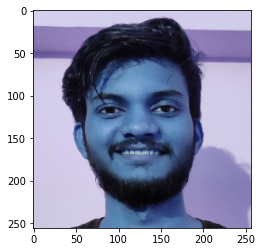

In [ ]:
for i in range(len(a)) :
  plt.imshow(n[i].T)
  plt.show()
  plt.imshow(a[i].T)
  plt.show()
  plt.imshow(p[i].T)
  plt.show()
  

In [ ]:
for i in range(0,10) :
  positive = torch.autograd.Variable(p)
  negative = torch.autograd.Variable(n)
  anchor   = torch.autograd.Variable(a)
  optimizer.zero_grad()
  res_p = net(positive)
  res_n = net(negative)
  res_a = net(anchor)
  loss  = criterion(res_a,res_p,res_n)
  loss.backward()
  optimizer.step()
  print(loss.data)


tensor(0.0044)
tensor(0.)
tensor(0.0391)
tensor(0.0091)
tensor(0.)
tensor(0.)
tensor(0.2006)
tensor(0.)
tensor(0.0289)
tensor(0.)
